<a href="https://colab.research.google.com/github/akshita9000/codealpha/blob/main/IRIS_FLOWER_CLASSFIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.shape

(150, 5)

In [ ]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


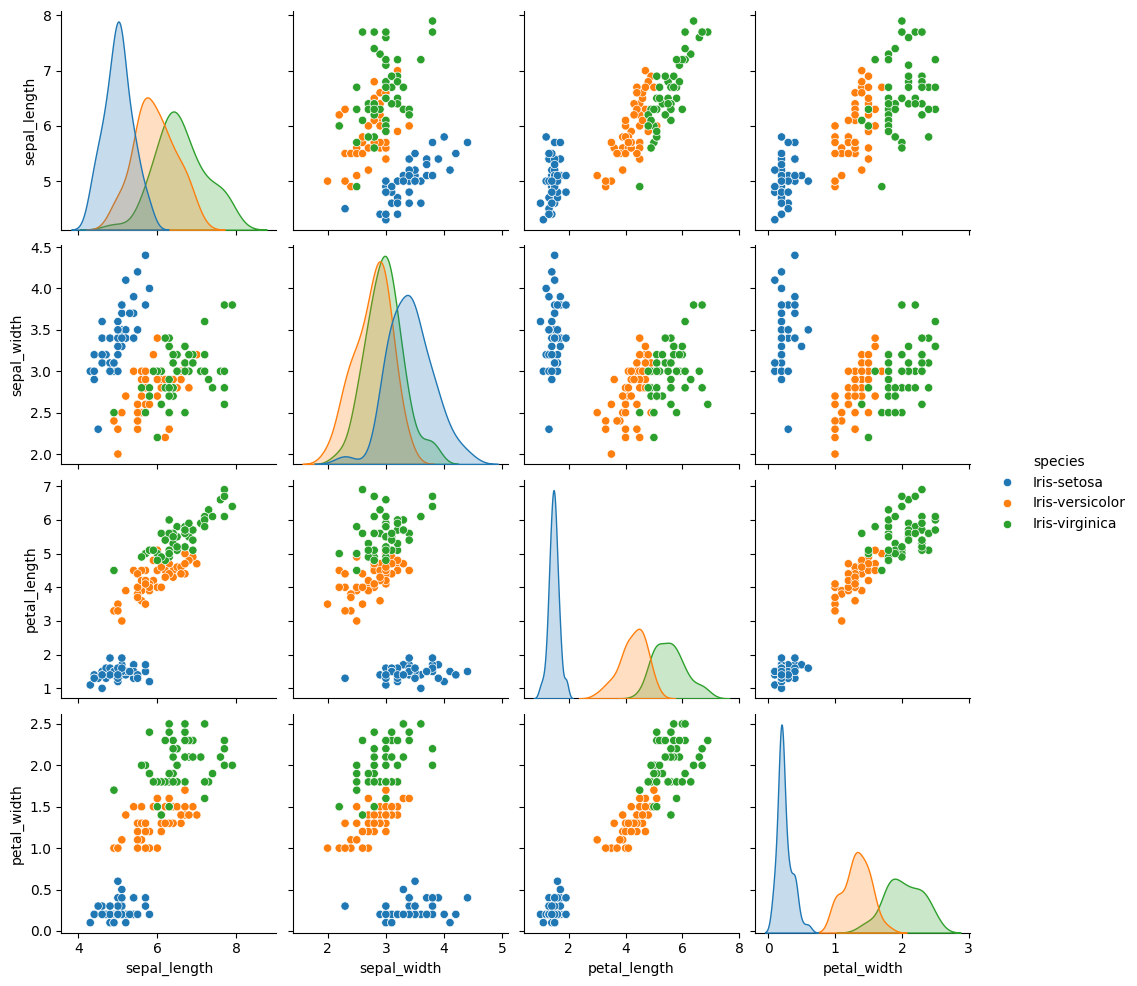

In [ ]:
sns.pairplot(df,hue='species')

Text(0.5, 1.0, 'sepal_length vs sepal_width')

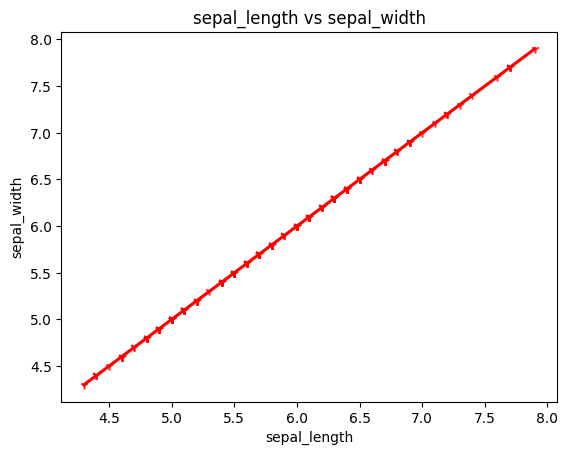

In [ ]:
import matplotlib.pyplot as plt
sns.regplot(data=df,x=df['sepal_length'],y=df['sepal_length'],ci=None,marker='1',color='red')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('sepal_length vs sepal_width')

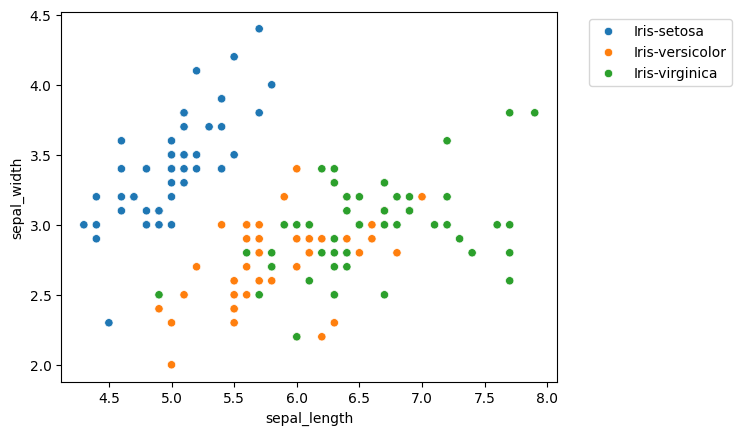

In [ ]:
sns.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


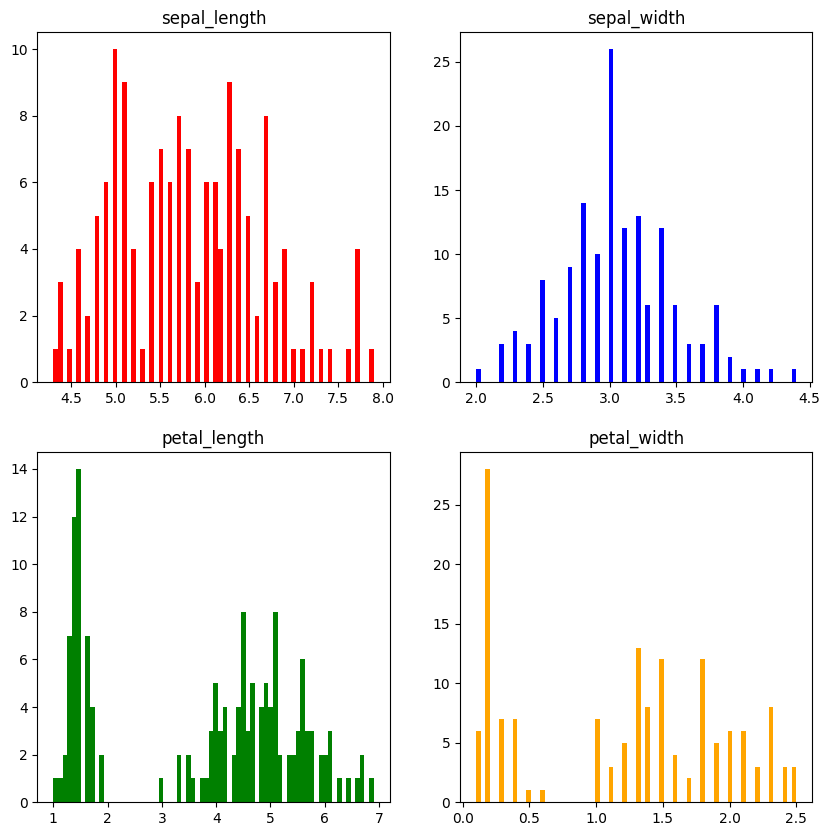

In [ ]:
fig,ax=plt.subplots (2,2, figsize=(10,10))
ax[0,0].set_title('sepal_length')
ax[0,0].hist(df['sepal_length'],bins=70,color='red')
ax[0,1].set_title('sepal_width')
ax[0,1].hist(df['sepal_width'],bins=70,color='blue')
ax[1,0].set_title('petal_length')
ax[1,0].hist(df['petal_length'],bins=70,color='green')
ax[1,1].set_title('petal_width')
ax[1,1].hist(df['petal_width'],bins=70,color='orange')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def graph(y):
  sns.boxplot(x='species',y=y,data=df)

  plt.figure(figsize=(10,10))

  plt.subplot(221)
  graph('sepal_length')

  plt.subplot(222)
  graph('sepal_width')

  plt.subplot(223)
  graph('petal_length')

  plt.subplot(224)
  graph('petal_width')

  plt.tight_layout()
  plt.show()

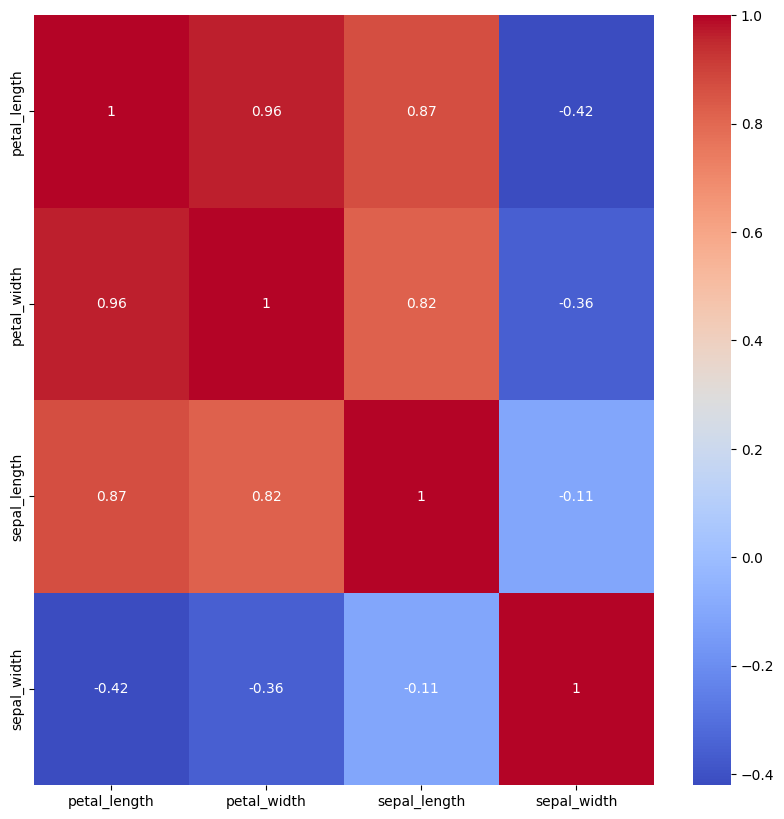

In [ ]:
plt.figure(figsize=(10,10))
corr=df[['petal_length','petal_width','sepal_length','sepal_width']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data=df.values
X=data[:,0:4]
Y=df['species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_test)

[[6.6 2.9 4.6 1.3]
 [6.4 3.2 4.5 1.5]
 [5.7 2.6 3.5 1.0]
 [5.1 3.5 1.4 0.3]
 [4.8 3.4 1.6 0.2]
 [6.3 3.3 4.7 1.6]
 [5.6 2.8 4.9 2.0]
 [4.9 3.1 1.5 0.1]
 [6.7 3.0 5.2 2.3]
 [4.6 3.2 1.4 0.2]
 [5.0 2.3 3.3 1.0]
 [5.9 3.2 4.8 1.8]
 [5.9 3.0 4.2 1.5]
 [6.7 3.1 4.7 1.5]
 [6.0 2.7 5.1 1.6]
 [5.1 3.7 1.5 0.4]
 [6.8 2.8 4.8 1.4]
 [5.5 2.3 4.0 1.3]
 [7.7 3.8 6.7 2.2]
 [5.4 3.9 1.3 0.4]
 [5.6 2.7 4.2 1.3]
 [4.9 2.5 4.5 1.7]
 [5.4 3.7 1.5 0.2]
 [5.6 3.0 4.5 1.5]
 [6.3 2.8 5.1 1.5]
 [7.0 3.2 4.7 1.4]
 [6.4 3.1 5.5 1.8]
 [5.7 4.4 1.5 0.4]
 [6.5 3.0 5.2 2.0]
 [5.1 2.5 3.0 1.1]
 [6.7 3.1 5.6 2.4]
 [5.8 2.7 4.1 1.0]
 [6.9 3.1 5.4 2.1]
 [6.1 2.8 4.0 1.3]
 [6.5 3.0 5.8 2.2]
 [6.6 3.0 4.4 1.4]
 [6.4 2.8 5.6 2.1]
 [4.8 3.0 1.4 0.1]
 [6.7 3.0 5.0 1.7]
 [5.2 2.7 3.9 1.4]
 [5.4 3.4 1.7 0.2]
 [5.5 4.2 1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [6.7 3.3 5.7 2.1]
 [6.3 3.3 6.0 2.5]]


In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [ ]:
predictions=model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.9111111111111111


In [ ]:
from sklearn.cluster import KMeans

wcss1=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df[['petal_length','petal_width']])
  wcss1.append(kmeans.inertia_)

In [ ]:
wcss1

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 20.316007803485395,
 14.147293864755932,
 11.056639971910453,
 9.297130812538596,
 8.043872171477286,
 6.773348650891444,
 6.254273015873015]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

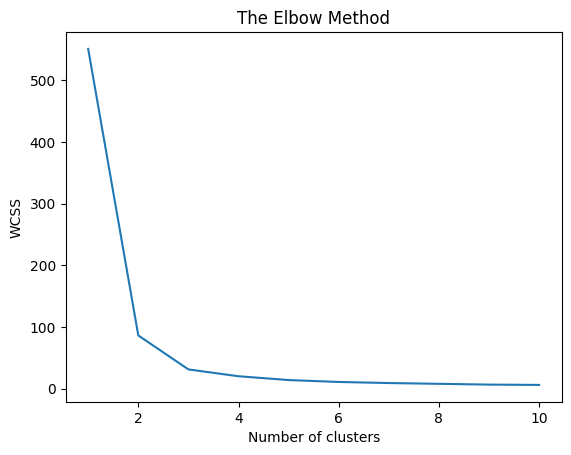

In [ ]:
plt.plot(range(1,11),wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
data_with_cluster1 = df.copy()
data_with_cluster1['cluster'] =kmeans.fit_predict(df[['petal_length','petal_width']])
data_with_cluster1

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,8
146,6.3,2.5,5.0,1.9,Iris-virginica,3
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,8


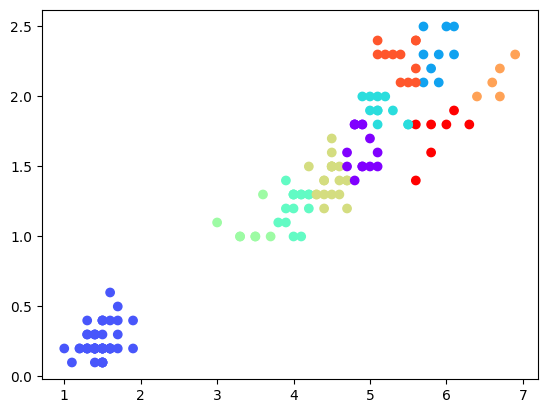

In [ ]:
plt.scatter(data_with_cluster1['petal_length'],data_with_cluster1['petal_width'],c=data_with_cluster1['cluster'],cmap='rainbow')
plt.show()